In [1]:
%matplotlib inline
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams.update({'figure.autolayout': False})


def read_sqlite(file):
    conn = sqlite3.connect(file)
    try:
        df = pd.read_sql_query('SELECT * FROM result', conn)
    except:
        return None
    finally:
        conn.close()
    return df

In [2]:
vals = [0.1, 0.178, 0.31, 0.562, 1, 1.778, 3.162, 5.623, 10, 17.783, 31.622, 56.234, 100]
dfs = dict(map(lambda x: (x, read_sqlite('results/duckdb_tpch1_flip_heap_{0:g}_results.sqlite'.format(x))), vals))
# dfs

In [3]:
for val in vals:
    dfs[val]['rate'] = val

In [4]:
merged_df = pd.concat(list(dfs.values()))
# merged_df

In [5]:
df = merged_df.groupby(['result', 'rate']).size().reset_index(name='counts')
# df

In [6]:
for result in range(5):
    for rate in vals:
        if len(df[(df['result'] == result) & (df['rate'] == rate)]) == 0:
            df = df.append({
                'result': result,
                'rate': rate,
                'counts': 0
            }, ignore_index=True)

df['result'] = df['result'].astype(int)
df['counts'] = df['counts'].astype(int)
df.sort_values(['result', 'rate'], inplace=True)
# df

In [7]:
pivoted = pd.pivot_table(df, values='counts', index='rate', columns='result')
pivoted.columns = ['ok', 'incorrect', 'crash', 'abnormal', 'timeout']
pivoted

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,92664,2011,2818,0,7
0.178,87466,3969,6044,0,21
0.310,80946,6556,9963,0,35
0.562,69105,10648,17668,0,79
1.000,52503,15464,29400,0,133
1.778,32647,18735,45916,1,201
3.162,14956,17285,64902,1,356
5.623,3642,10294,83024,0,540
10.000,311,2893,93537,0,759


In [8]:
pivoted / 97500

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,0.950400,0.020626,0.028903,0.00000,0.000072
0.178,0.897087,0.040708,0.061990,0.00000,0.000215
0.310,0.830215,0.067241,0.102185,0.00000,0.000359
0.562,0.708769,0.109210,0.181210,0.00000,0.000810
1.000,0.538492,0.158605,0.301538,0.00000,0.001364
1.778,0.334841,0.192154,0.470933,0.00001,0.002062
3.162,0.153395,0.177282,0.665662,0.00001,0.003651
5.623,0.037354,0.105579,0.851528,0.00000,0.005538
10.000,0.003190,0.029672,0.959354,0.00000,0.007785


In [8]:
print(pivoted.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     ok &  incorrect &  crash &  abnormal &  timeout \\
rate    &        &            &        &           &          \\
\midrule
0.100   &  92664 &       2011 &   2818 &         0 &        7 \\
0.178   &  87466 &       3969 &   6044 &         0 &       21 \\
0.310   &  80946 &       6556 &   9963 &         0 &       35 \\
0.562   &  69105 &      10648 &  17668 &         0 &       79 \\
1.000   &  52503 &      15464 &  29400 &         0 &      133 \\
1.778   &  32647 &      18735 &  45916 &         1 &      201 \\
3.162   &  14956 &      17285 &  64902 &         1 &      356 \\
5.623   &   3642 &      10294 &  83024 &         0 &      540 \\
10.000  &    311 &       2893 &  93537 &         0 &      759 \\
17.783  &      3 &        183 &  96305 &         0 &     1009 \\
31.622  &      0 &          2 &  96493 &         0 &     1005 \\
56.234  &      0 &          0 &  96633 &         0 &      867 \\
100.000 &      0 &          0 &  96902 &         0 & 

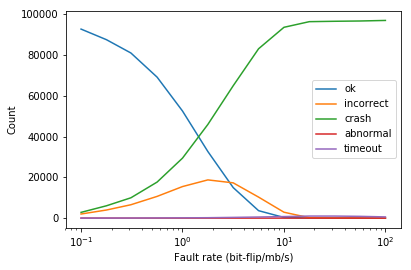

In [9]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate (bit-flip/mb/s)')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

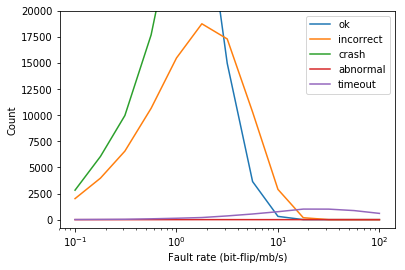

In [10]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate (bit-flip/mb/s)')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.ylim(-800, 20000)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


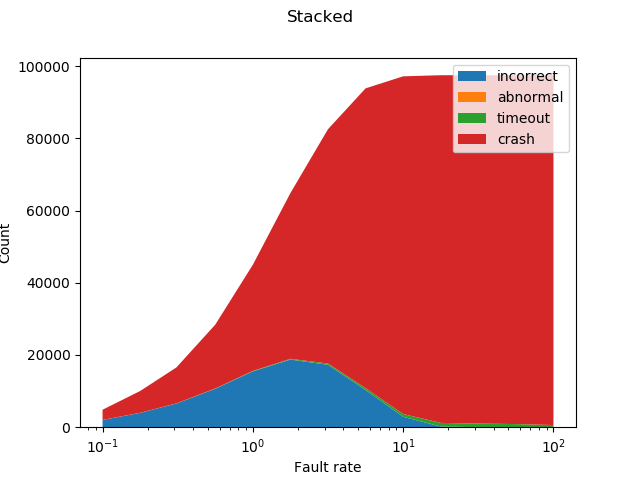

In [9]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              pivoted['crash'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout', 'crash'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


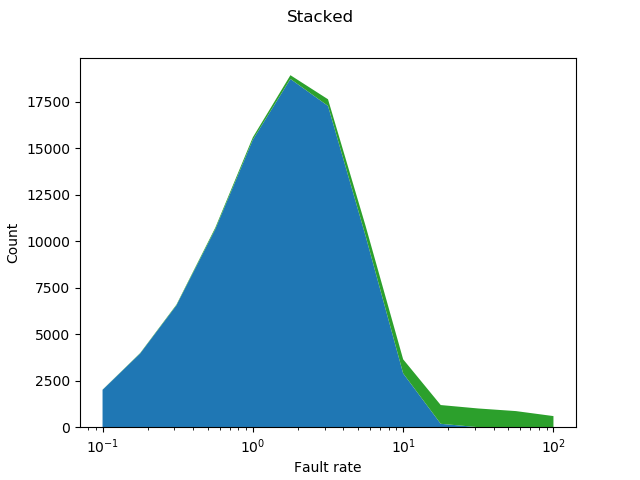

In [11]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout'])
plt.show()

<IPython.core.display.Javascript object>


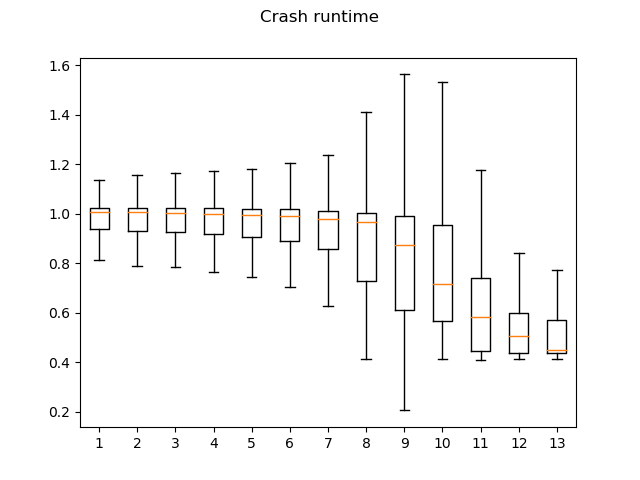

In [10]:
fig = plt.figure()

fig.suptitle('Crash runtime')

df_2 = merged_df[merged_df['result'] == 2]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


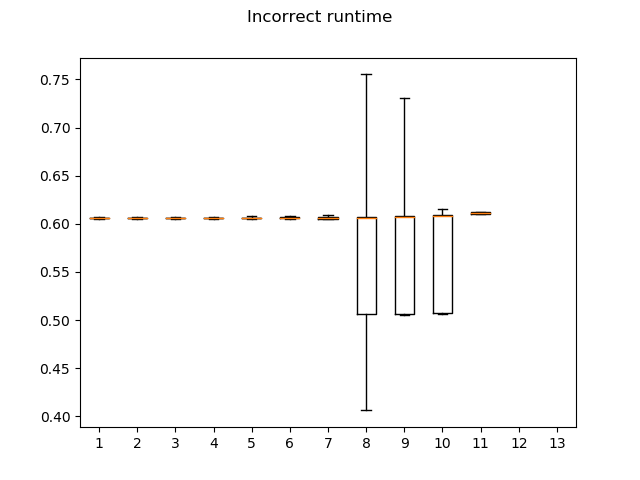

In [13]:
fig = plt.figure()

fig.suptitle('Incorrect runtime')

df_2 = merged_df[merged_df['result'] == 1]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


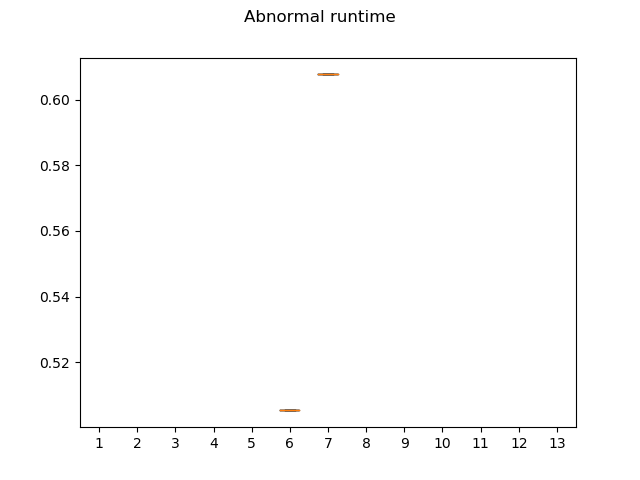

In [11]:
fig = plt.figure()

fig.suptitle('Abnormal runtime')

df_2 = merged_df[merged_df['result'] == 3]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


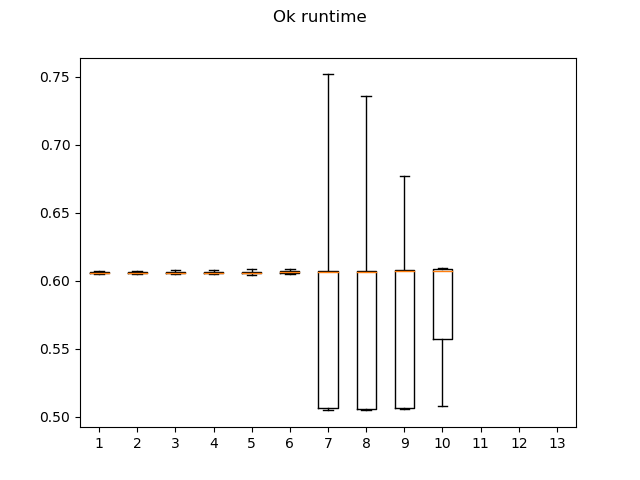

In [15]:
fig = plt.figure()

fig.suptitle('Ok runtime')

df_2 = merged_df[merged_df['result'] == 0]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

In [13]:
crashes = merged_df[merged_df['result'] == 2]
signals = crashes['term_sig'].unique()
crash_count = crashes.groupby(['term_sig', 'rate']).size().reset_index(name='counts')
crash_pivoted = pd.pivot_table(crash_count, values='counts', index='rate', columns='term_sig', fill_value=0)
crash_pivoted

term_sig,4,5,6,7,11
rate,,,,,
0.100,0,0,1004,116,1698
0.178,0,0,2037,250,3757
0.310,0,0,3434,423,6106
0.562,0,0,5849,640,11179
1.000,1,0,9534,1025,18840
1.778,0,0,14633,1508,29775
3.162,0,1,19878,1841,43182
5.623,0,0,22982,1850,58192
10.000,2,0,20709,1234,71592


<IPython.core.display.Javascript object>


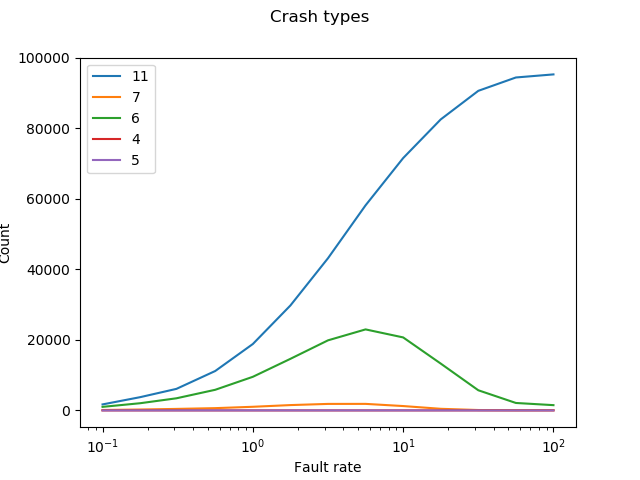

In [14]:
fig = plt.figure()
fig.suptitle('Crash types')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')

for signal in signals:
    plt.plot(vals, crash_pivoted[signal], label=str(signal))
    
plt.legend()
plt.show()